In [26]:
import pandas as pd
import os 
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
dpath = "/scratch/indikar_root/indikar1/cstansbu/scpc_test/reports/coverage_by_reference/"


chroms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', 'X',]

res = []

for f in os.listdir(dpath):
    ref = f.split(".")[0]
    fpath = f"{dpath}{f}"
    df = pd.read_csv(fpath, sep='\t')
    df = df[df['#rname'].isin(chroms)]
    df['ref'] = ref
    res.append(df)


df = pd.concat(res)
df.head()

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,ref
0,1,1,195154279,1633,151307,0.077532,0.001843,19.9,46.6,GRCm39
1,2,1,181755017,2542,150329,0.082710,0.003009,21.8,35.9,GRCm39
2,3,1,159745316,1321,134187,0.084001,0.001902,20.0,48.2,GRCm39
3,4,1,156860686,1473,153526,0.097874,0.002213,20.0,45.0,GRCm39
4,5,1,151758149,1347,120486,0.079393,0.001913,20.3,47.0,GRCm39


Text(0.5, 0, 'chrom')

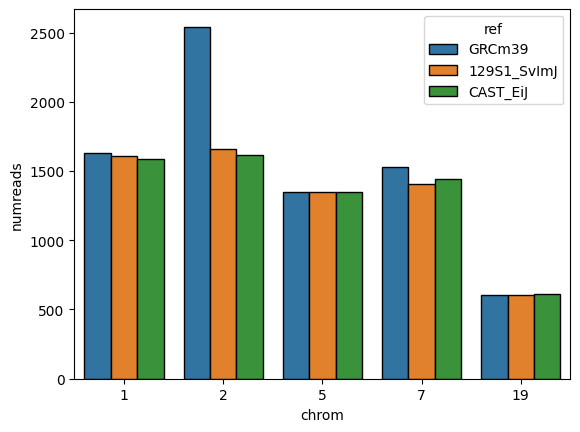

In [30]:
mask = (df['#rname'].isin(['1', '2', '5', '7', '19']))

sns.barplot(data=df[mask], 
            x='#rname',
            y='numreads',
            ec='k',
            hue='ref')

plt.xlabel('chrom')